# Decision Tree Lesson

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

### Question: Can we predict whether someone is a smoker based on the tips data?

In [3]:
np.random.seed(25)
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips = pd.get_dummies(tips, columns=['sex', 'day', 'time'], drop_first=True)
tips.head()

,total_bill,tip,smoker,size,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,No,2,1,0,0,1,1
1,10.34,1.66,No,3,0,0,0,1,1
2,21.01,3.50,No,3,0,0,0,1,1
3,23.68,3.31,No,2,0,0,0,1,1
4,24.59,3.61,No,4,1,0,0,1,1


In [7]:
X = tips[['total_bill', 'tip', 'size']]
y = tips.smoker

In [9]:
y

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']

In [10]:
X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [11]:
X_train.head()

,total_bill,tip,size
113,23.95,2.55,2
100,11.35,2.50,2
13,18.43,3.00,4
152,17.26,2.74,3
94,22.75,3.25,2


In [12]:
y_train[:5]

113     No
100    Yes
13      No
152     No
94      No
Name: smoker, dtype: category
Categories (2, object): ['Yes', 'No']

In [13]:
y_train.value_counts()

No     83
Yes    53
Name: smoker, dtype: int64

## Decision Tree Modeling

#### Step 1: Create Your Recipe

In [14]:
# Create the decision tree object and specify hyperparams
tree = DecisionTreeClassifier(max_depth = 3)

#### Step 2: Fit your model to your in-sample data (train)

Until a model learns from your data, its just an algorithm. After it has learned and changed its algorithmic structure (i.e. has decided which questions to ask and in what order), then it can be called a model.

In [15]:
tree.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- total_bill <= 32.65
|   |--- tip <= 1.00
|   |   |--- class: Yes
|   |--- tip >  1.00
|   |   |--- total_bill <= 28.36
|   |   |   |--- class: No
|   |   |--- total_bill >  28.36
|   |   |   |--- class: No
|--- total_bill >  32.65
|   |--- size <= 5.00
|   |   |--- class: Yes
|   |--- size >  5.00
|   |   |--- class: No



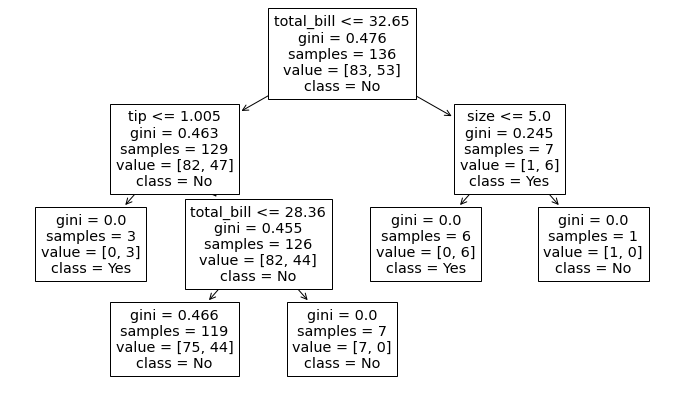

In [16]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

#### Step 3: Use your model to make predictions on the in-sample data

In [17]:
tree.predict(X_train)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No'], dtype=object)

In [18]:
predictions = tree.predict(X_train)
actual = y_train

#### Step 4: Evaluate your predictions

In [19]:
confusion_matrix(actual, predictions)

array([[83,  0],
       [44,  9]])

In [20]:
pd.crosstab(actual, predictions)

col_0,No,Yes
smoker,,
Yes,44,9
No,83,0


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


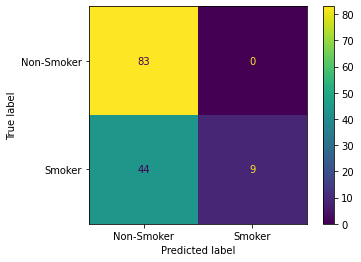

In [21]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['Non-Smoker', 'Smoker'])

In [22]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.65      1.00      0.79        83
         Yes       1.00      0.17      0.29        53

    accuracy                           0.68       136
   macro avg       0.83      0.58      0.54       136
weighted avg       0.79      0.68      0.60       136



#### Step 5: Use best n models on out-of-sample data (validate)

In this case, I only have one model

In [23]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.68      0.86      0.76        22
         Yes       0.50      0.25      0.33        12

    accuracy                           0.65        34
   macro avg       0.59      0.56      0.55        34
weighted avg       0.62      0.65      0.61        34



#### Step 6: Use single best model to make predictions from out-of-sample data (test)

In [24]:
predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

          No       0.62      0.85      0.72        46
         Yes       0.36      0.14      0.21        28

    accuracy                           0.58        74
   macro avg       0.49      0.50      0.46        74
weighted avg       0.52      0.58      0.52        74



#### Bonus: What happens if we change some of the hyperparameters?

Let's try changing max depth to none. This model will ask questions until every leaf gini is as small as absolutely possible:

In [25]:
# Create the decision tree object and specify hyperparams
tree = DecisionTreeClassifier(max_depth=None) 
tree.fit(X_train, y_train)

print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- total_bill <= 32.65
|   |--- tip <= 1.00
|   |   |--- class: Yes
|   |--- tip >  1.00
|   |   |--- total_bill <= 28.36
|   |   |   |--- total_bill <= 26.50
|   |   |   |   |--- tip <= 3.96
|   |   |   |   |   |--- size <= 2.50
|   |   |   |   |   |   |--- tip <= 1.49
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- tip >  1.49
|   |   |   |   |   |   |   |--- tip <= 3.49
|   |   |   |   |   |   |   |   |--- tip <= 3.39
|   |   |   |   |   |   |   |   |   |--- tip <= 3.23
|   |   |   |   |   |   |   |   |   |   |--- tip <= 3.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- tip >  3.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |--- tip >  3.23
|   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- tip >  3.39
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- ti

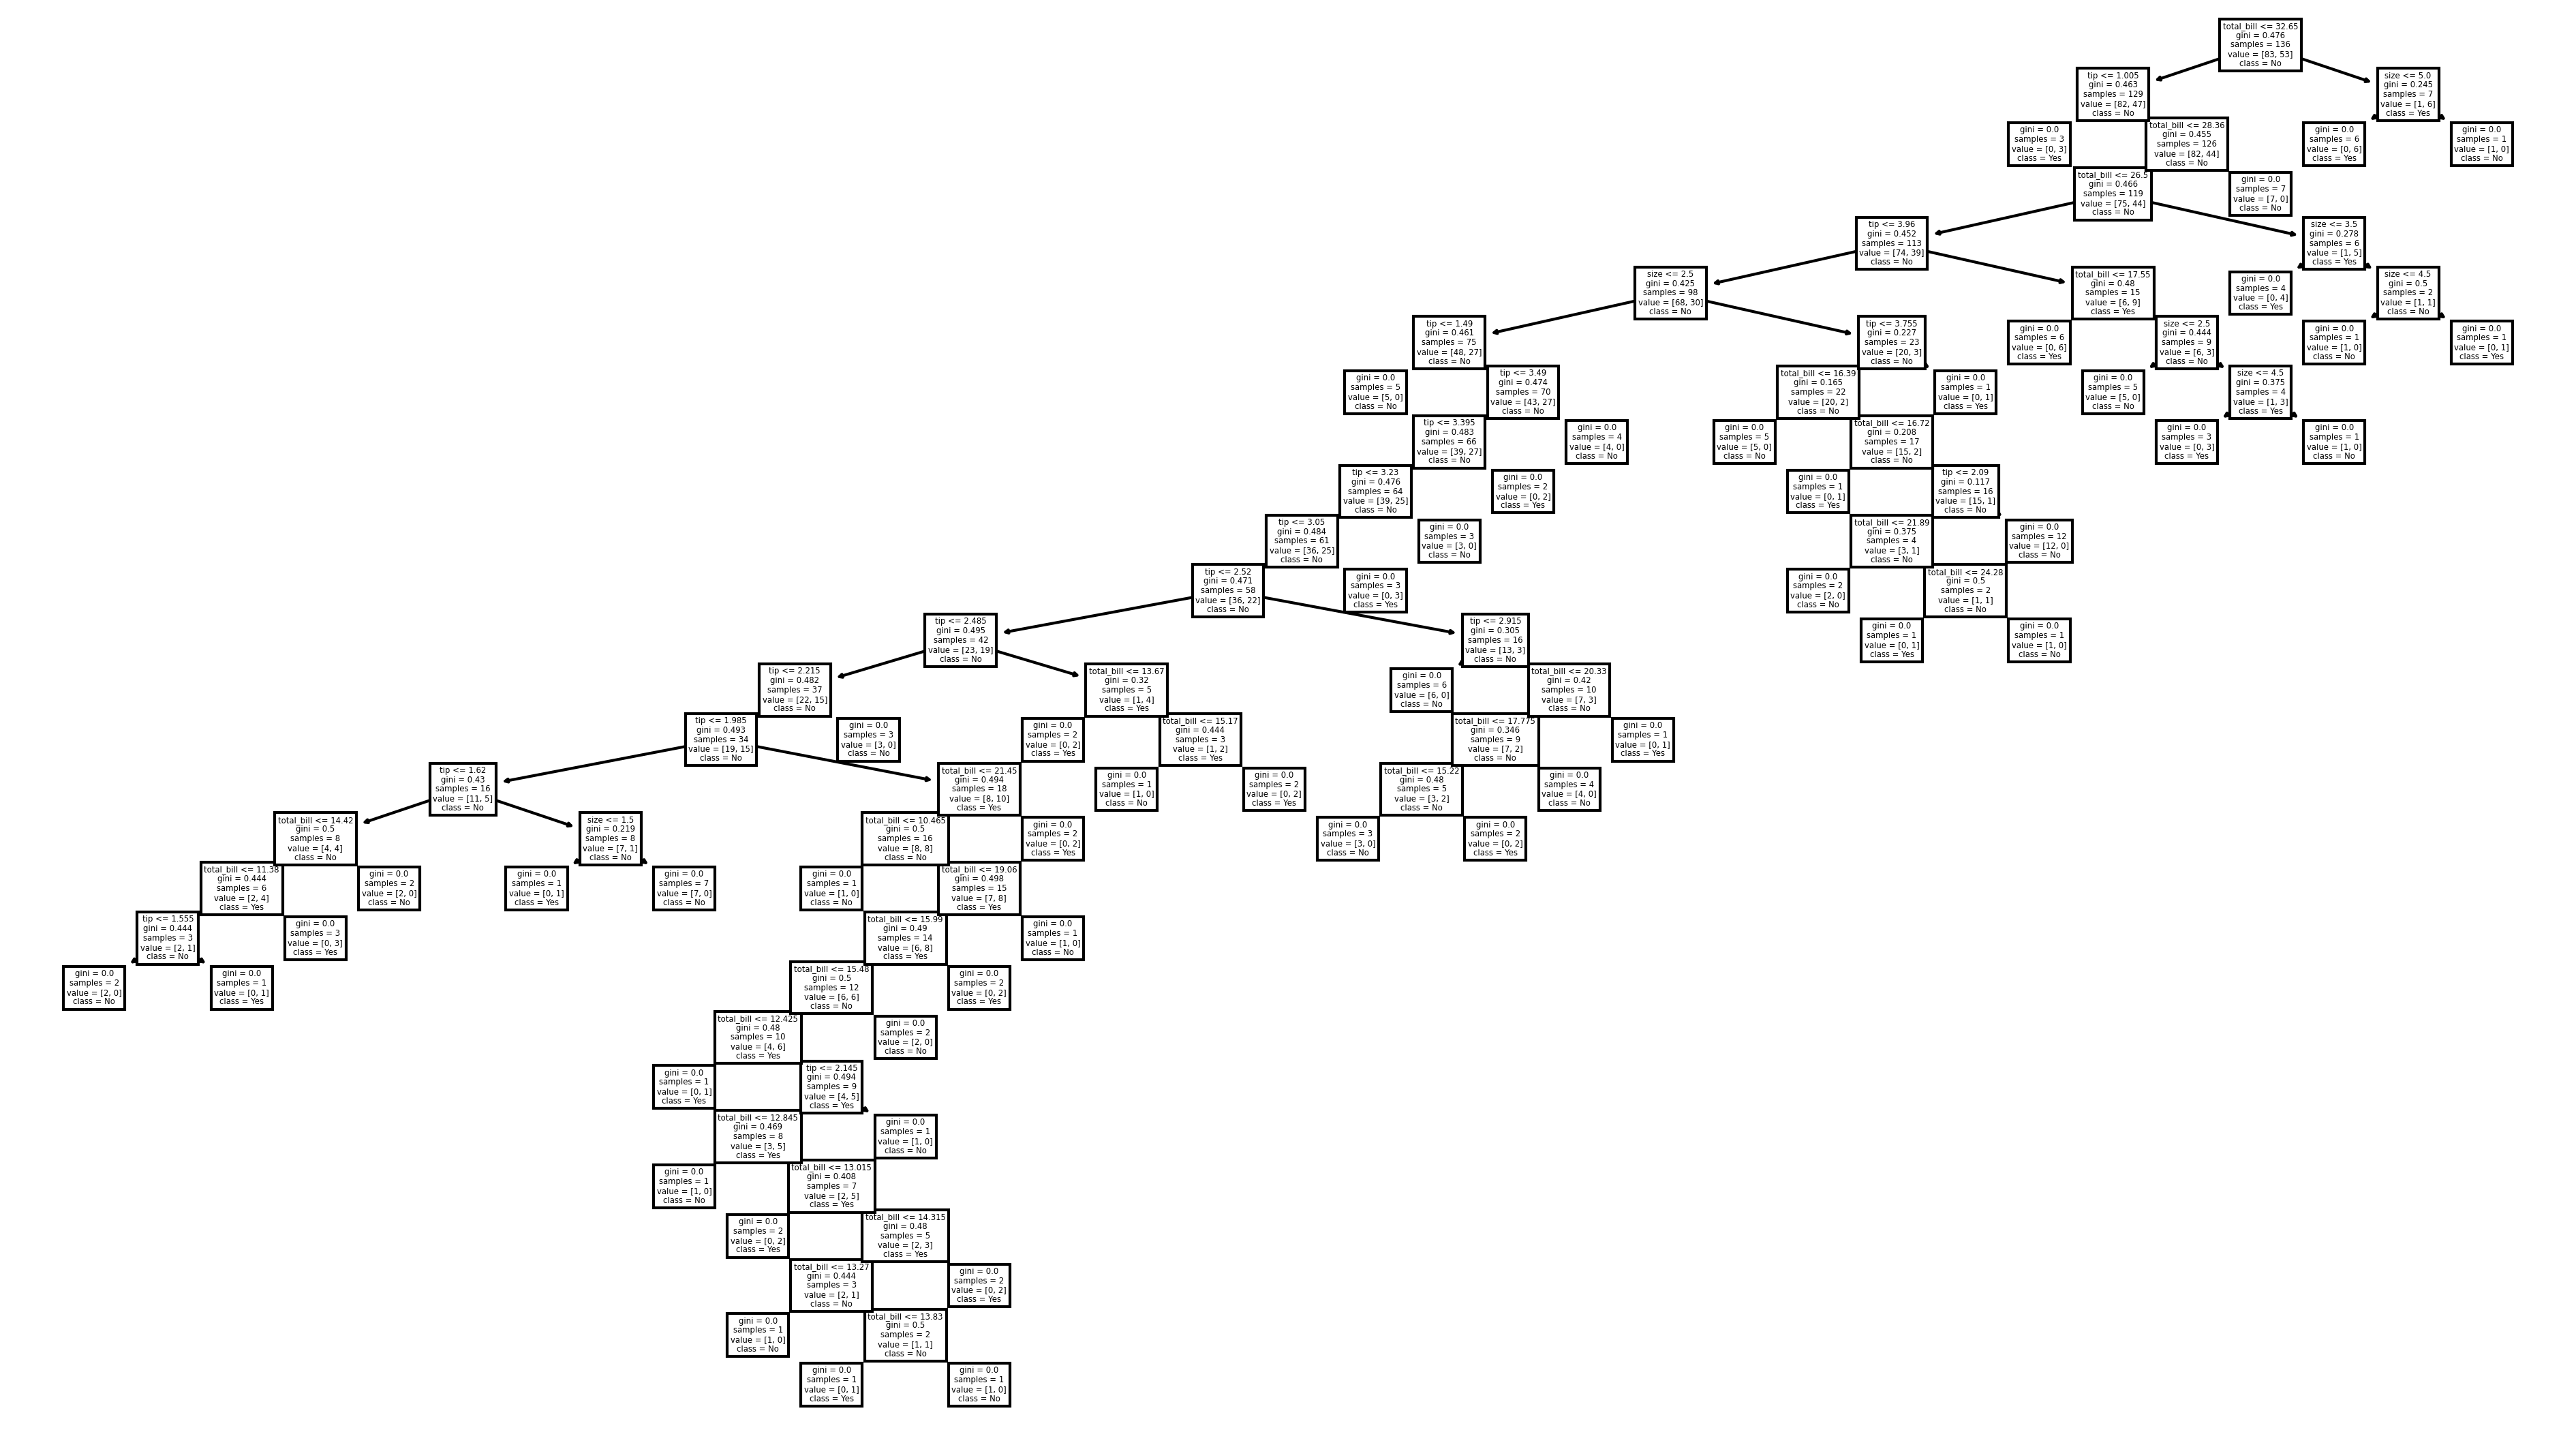

In [26]:
plt.figure(figsize=(16, 9), dpi=300)
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

#### How accurate is our crazy model on our training data?

In [27]:
tree.score(X_train, y_train) # 100%!

1.0

#### How accurate is our crazy model on out-of-sample data?

In [28]:
tree.score(X_validate, y_validate) 

0.5294117647058824

In [29]:
y_validate.value_counts(normalize=True)

No     0.647059
Yes    0.352941
Name: smoker, dtype: float64

We would have had better accuracy just guessing "No" on everything

## What did we miss? What can we do next?

- Making a baseline model and properly evaluating it
- Make more models, try out different combinations of independent variables and hyperparameters
> **Note**: Our X can change, but our y remains constant
- Quantify and compare those models (on validate!) against each other and the baseline

## Pruning
Decision Trees have a high risk of being overfit to our training data. We can use `max_depth` and `min_samples` as a way to reduce overfitting. We could build a process that exhaustively checked every hyperparameter combination or we can use an existing process:
- Look into [`cost_complexity_pruning_path`](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

# Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.